# Anisotropía en objetos compactos

## Resolver ecuaciones de campo de Einstein para un objeto estático, simétricamente esférico y anisótropo

### Conociendo $\Delta = P_{\perp} - P$ y $\rho = \rho(r)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amssymb}'})
plt.rcParams.update({'text.usetex': True,'font.serif': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["savefig.bbox"] = 'tight'

In [3]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msol = 1.989*10**(30)      # 1 Masa solar en kilogramos

## Ecuaciones de estructura: 

\begin{align}
    \frac{\mathrm{d}P}{\mathrm{d}r} &= -\frac{G m\rho}{r^{2}} \left(1 + \frac{P}{\rho c^{2}}\right)\left(1 + \frac{4\pi r^{3}P}{m c^{2}}\right)\left(1 - \frac{2Gm}{rc^{2}}\right)^{-1} + \frac{2\left(P_{\perp}-P\right)}{r} \\
    &= -G\frac{\left[\rho + \left(P/c^{2}\right)\right]\left[m + \left(4\pi r^{3}P/c^{2}\right)\right]}{r\left[r - \left(2mG/c^{2}\right)\right]} + \frac{2\left(P_{\perp}-P\right)}{r} \qquad \text{y} \\
    \frac{\mathrm{d}m}{\mathrm{d}r} &= 4\pi r^{2}\rho\,.
\end{align}

### En sistema de unidades geométricas ($c=G=1$) se tiene

\begin{align}
    \frac{\mathrm{d}P}{\mathrm{d}r} &= -\frac{m\rho}{r^{2}} \left(1 + \frac{P}{\rho}\right)\left(1 + \frac{4\pi r^{3}P}{m}\right)\left(1 - \frac{2m}{r}\right)^{-1} + \frac{2\left(P_{\perp}-P\right)}{r} \\
    &= -\frac{\left(\rho + P\right)\left(m + 4\pi r^{3}P\right)}{r\left(r - 2m\right)} + \frac{2\left(P_{\perp}-P\right)}{r} \qquad \text{y} \\
    \frac{\mathrm{d}m}{\mathrm{d}r} &= 4\pi r^{2}\rho\,.
\end{align}

Se adimensionaliza las ecuaciones de estructura proponiendo:

\begin{align*}
    m = R\tilde{m}\,, \quad P = \frac{1}{R^{2}}\tilde{P}\,, \quad P_{\perp} = \frac{1}{R^{2}}\tilde{P}_{\perp}\,, \quad \rho = \frac{1}{R^{2}}\tilde{\rho}\,, \quad r = R x\,.
\end{align*}


Por lo tanto, las ecuaciones ahora son

\begin{align*}
    \frac{\mathrm{d}\tilde{P}}{\mathrm{d}x} &= -\frac{\left(\tilde{\rho} + \tilde{P}\right)\left(\tilde{m} + 4\pi\tilde{P}x^{3}\right)}{x\left(x-2\tilde{m}\right)} + \frac{2\left(\tilde{P}_{\perp} - \tilde{P}\right)}{x}  \qquad \text{y} \\
    \frac{\mathrm{d}\tilde{m}}{\mathrm{d}x} &= 4\pi\tilde{\rho}x^{2} \,.
\end{align*}

Por otra parte, la anisotropía (Karmarkar) es
\begin{equation}
    P_{\perp} - P = \frac{\rho_{c}\alpha r^{2}}{5\rho}\left(\frac{\rho - 3P}{2} - \frac{\rho_{c}\alpha r^{2}}{5}\right) = \Delta \,.
\end{equation}
Adimensionalizando se tiene
\begin{equation}
    \tilde{\Delta} = \frac{\tilde{\rho}_{c} \tilde{\alpha} x^{2}}{5\tilde{\rho}}\left(\frac{\tilde{\rho} - 3\tilde{P}}{2} - \frac{\tilde{\rho}_{c}\tilde{\alpha}x^{2}}{5}\right)\,.
\end{equation}

Ahora, introducimos el perfil de densidad
\begin{align*}
    \tilde{\rho} = \tilde{\rho}_{c}\left(1-\alpha x^{2}\right)\,,
\end{align*}
por lo que la masa es
\begin{align*}
    \tilde{m} = 4\pi\tilde{\rho}_{c}\left(\frac{x^{3}}{3} - \alpha\frac{x^{5}}{5}\right)
\end{align*}
y puede ser reemplazada en la ecuación de equilibrio hidrostático.

In [4]:
# Ecuación de equilibrio hidrostático a resolver
def EcEqHid(x,P_,rho_c_til,varkappa,C):
    return -(rho_tilde(x,rho_c_til,varkappa) + P_)*(m_tilde(x,rho_c_til,varkappa) + 4*np.pi*x**(3)*P_)/x/(x - 2*m_tilde(x,rho_c_til,varkappa)) + 2*Delta_tilde(x,P_,rho_c_til,varkappa,C)/x

La densidad adimensional en el centro es
\begin{equation}
    \tilde{\rho}\left(x=0\right) = \tilde{\rho}_{c}\,,
\end{equation}
mientras que en el borde es
\begin{equation}
    \tilde{\rho}\left(x=x_{b}\right) = \tilde{\rho}_{c}\left(1-\alpha\right) = \tilde{\rho}_{b}\,\,;\, x_{b} = 1\,.
\end{equation}
De lo anterior podemos escribir el perfil de densidad como
\begin{equation}
    \tilde{\rho} = \tilde{\rho}_{c}\left[1-\left(1-\varkappa\right)x^{2}\right]\,;\,\, \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}

In [5]:
# Función densidad
def rho_tilde(x,rho_c_til,varkappa):
    return rho_c_til*(1-(1-varkappa)*x**2)

# Función masa
def m_tilde(x,rho_c_til,varkappa):
    return 4*np.pi*rho_c_til*((x**3/3)-(1-varkappa)*(x**5/5))

# Anisotropía Cosenza
def Delta_tilde(x,P_,rho_c_til,varkappa,C):
    return C*(rho_c_til*(1-varkappa)*x**2/5/rho_tilde(x,rho_c_til,varkappa))*((rho_tilde(x,rho_c_til,varkappa) - 3*P_)/2 - rho_c_til*(1-varkappa)*x**2/5)

Dando $R$, el valor en metros del radio total, se tiene que
\begin{align}
    \rho_{s} &= \frac{c^{2}}{GR^{2}} \,\,\Rightarrow\,\, \tilde{\rho}_{c} = \frac{GR^{2}}{c^{2}}\rho_{c}\,, \\
    P_{s} &= \frac{c^{4}}{GR^{2}} = \rho_{s}c^{2}\,, \\
    m_{s} &= \frac{Rc^{2}}{G}\,.
\end{align}

Dando $M_{\odot}$, el valor de la masa total en unidades de masa solar, se tiene que
\begin{align}
    R = \frac{M_{\odot}M_{sol}}{\tilde{M}}\frac{G}{c^{2}} \quad \Rightarrow \quad R = \left\{\frac{M_{\odot}M_{sol}}{4\pi\rho_{c}\left[\frac{1}{3}-\left(1-\varkappa\right)\frac{1}{5}\right]}\right\}^{1/3}\,,
\end{align}
donde $M_{sol}$ es la masa del sol en kilogramos. 

In [6]:
Lista_C = np.round(np.arange(0,4.8,0.0025),4)
print('Valores de C: ',end='')
print(*Lista_C, sep=', ')

Lista_rho_c = np.linspace(0.1,2.5,9)
Lista_rho_c = [i*10**18 for i in Lista_rho_c]
print('\nValores de \u03c1_c: ',end='')
print(*Lista_rho_c, sep=', ')

Lista_varkappa = [10**-3,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
print('\nValores de \u03f0: ',end='')
print(*Lista_varkappa, sep=', ')

# Número total de modelos evaluados
Numero_de_modelos = len(Lista_C)*len(Lista_rho_c)*len(Lista_varkappa)
print('\nNúmero de modelos: ', Numero_de_modelos)

Valores de C: 0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05, 0.0525, 0.055, 0.0575, 0.06, 0.0625, 0.065, 0.0675, 0.07, 0.0725, 0.075, 0.0775, 0.08, 0.0825, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.1225, 0.125, 0.1275, 0.13, 0.1325, 0.135, 0.1375, 0.14, 0.1425, 0.145, 0.1475, 0.15, 0.1525, 0.155, 0.1575, 0.16, 0.1625, 0.165, 0.1675, 0.17, 0.1725, 0.175, 0.1775, 0.18, 0.1825, 0.185, 0.1875, 0.19, 0.1925, 0.195, 0.1975, 0.2, 0.2025, 0.205, 0.2075, 0.21, 0.2125, 0.215, 0.2175, 0.22, 0.2225, 0.225, 0.2275, 0.23, 0.2325, 0.235, 0.2375, 0.24, 0.2425, 0.245, 0.2475, 0.25, 0.2525, 0.255, 0.2575, 0.26, 0.2625, 0.265, 0.2675, 0.27, 0.2725, 0.275, 0.2775, 0.28, 0.2825, 0.285, 0.2875, 0.29, 0.2925, 0.295, 0.2975, 0.3, 0.3025, 0.305, 0.3075, 0.31, 0.3125, 0.315, 0.3175, 0.32, 0.3225, 0.325, 0.3275, 0.33, 0.3325, 0.335, 0.3375, 0.34

, 3.0975, 3.1, 3.1025, 3.105, 3.1075, 3.11, 3.1125, 3.115, 3.1175, 3.12, 3.1225, 3.125, 3.1275, 3.13, 3.1325, 3.135, 3.1375, 3.14, 3.1425, 3.145, 3.1475, 3.15, 3.1525, 3.155, 3.1575, 3.16, 3.1625, 3.165, 3.1675, 3.17, 3.1725, 3.175, 3.1775, 3.18, 3.1825, 3.185, 3.1875, 3.19, 3.1925, 3.195, 3.1975, 3.2, 3.2025, 3.205, 3.2075, 3.21, 3.2125, 3.215, 3.2175, 3.22, 3.2225, 3.225, 3.2275, 3.23, 3.2325, 3.235, 3.2375, 3.24, 3.2425, 3.245, 3.2475, 3.25, 3.2525, 3.255, 3.2575, 3.26, 3.2625, 3.265, 3.2675, 3.27, 3.2725, 3.275, 3.2775, 3.28, 3.2825, 3.285, 3.2875, 3.29, 3.2925, 3.295, 3.2975, 3.3, 3.3025, 3.305, 3.3075, 3.31, 3.3125, 3.315, 3.3175, 3.32, 3.3225, 3.325, 3.3275, 3.33, 3.3325, 3.335, 3.3375, 3.34, 3.3425, 3.345, 3.3475, 3.35, 3.3525, 3.355, 3.3575, 3.36, 3.3625, 3.365, 3.3675, 3.37, 3.3725, 3.375, 3.3775, 3.38, 3.3825, 3.385, 3.3875, 3.39, 3.3925, 3.395, 3.3975, 3.4, 3.4025, 3.405, 3.4075, 3.41, 3.4125, 3.415, 3.4175, 3.42, 3.4225, 3.425, 3.4275, 3.43, 3.4325, 3.435, 3.4375, 3.44, 3.

In [7]:
%%time

Z = []

for i in range(len(Lista_C)):
    
    Z.append([])
    
    C = Lista_C[i]
    
    for j in range(len(Lista_rho_c)):
                
        rho_c = Lista_rho_c[j]
        
        for k in range(len(Lista_varkappa)):
                        
            varkappa = Lista_varkappa[k]
        
            M_odot = 2.08                     # Masa total en unidades de masa solar
            R = (M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3) 
            rho_c_til = G*R**2*rho_c/c**2 
            
    
            P0 = 0                 # Condición inicial para Ecuación de equilibrio hidrostático
        
            xmin = 10**-15   
            xmax = 1
            x_span = (xmax,xmin)   # Integración desde el borde (x=1) hacia el centro (x=0)
        
            soluciones = solve_ivp(EcEqHid,x_span,[P0],args=[rho_c_til,varkappa,C],method='RK45',max_step=1/50)
        
            P_til = soluciones.y[0]                                      # Presión radial adimensional
            x = soluciones.t                                             # Radio adimensional
            m_til = m_tilde(x,rho_c_til,varkappa)                        # Masa adimensional
            rho_til = rho_tilde(x,rho_c_til,varkappa)                    # Densidad de energía adimensional
            Delta_til = Delta_tilde(x,P_til,rho_c_til,varkappa,C)        # Anisotropía adimensional
            Pt_til = Delta_til + P_til                                   # Presión tangencial adimensional
            gradrho_til = np.gradient(rho_til,x)                         # Derivada de la densidad de energía adimensional
            gradP_til = np.gradient(P_til,x)                             # Derivada de la presión radial adimensional
            gradPt_til = np.gradient(Pt_til,x)                           # Derivada de la presión tangencial adimensional
            vs2 = gradP_til/gradrho_til                                  # Velocidad del sonido radial al cuadrado
            vst2 = gradPt_til/gradrho_til                                # Velocidad del sonido tangencial al cuadrado
            gradgradrho_til = np.gradient(gradrho_til,x)                 # Derivada segunda de la densidad de energía adimensional
            gradvs2 = np.gradient(vs2,x)                                 # Derivada de la velocidad del sonido radial al cuadrado
            
            ## Condición 1
            C1 = 2*m_til/x
            if any(C1 >= 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 2
            C2A = rho_til
            C2B = P_til
            C2C = Pt_til
            C2 = [C2A,C2B,C2C]
            if any(C2[0] < 0) or any(C2[1] < 0) or any(C2[2] < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 3
            C3A = gradrho_til
            C3B = gradP_til
            C3C = gradPt_til
            C3 = [C3A,C3B,C3C]
            if any(C3[0] > 0) or any (C3[1] > 0) or any (C3[2] > 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 4
            C4 = rho_til - P_til - 2*Pt_til
            if any(C4 < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 5
            C5A = vs2             
            C5B = vst2   
            C5 = [C5A,C5B]
            if any(C5[0] > 1) or any(C5[1] > 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 6
            C6 = ((rho_til[1:] + P_til[1:])*vs2[1:]/P_til[1:])
            if any(C6 < 4/3): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 7
            #C7 = var_M_til
        
            ## Condición 8
            C8rho = (m_til + 4*np.pi*x**3*P_til)/x/(x - 2*m_til)
            C8P = ((m_til + 4*np.pi*x**3*(rho_til + 2*P_til))/x/(x - 2*m_til) + 2/x)*vs2
            C8Pt = -(2/x)*vst2
            C8m = ((rho_til + P_til)*(1 + 8*np.pi*x**2*P_til)/(x - 2*m_til)**2)*(4*np.pi*x**2*rho_til/gradrho_til)
            C8dP = gradvs2 + vs2*gradgradrho_til/gradrho_til
            C8T = C8rho+C8P+C8Pt+C8m+C8dP
        
            C8 = [C8T,C8rho,C8P,C8Pt,C8m,C8dP]
            if any(np.diff(np.sign(C8[0][2:-1])) != 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 9
            C9 = gradgradrho_til
            
            Z[i].append(int(9))
            

<timed exec>:39: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\marce\anaconda3\lib\site-packages\numpy\lib\function_base.py:1081: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
C:\Users\marce\anaconda3\lib\site-packages\numpy\lib\function_base.py:1081: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Wall time: 40min 50s


In [22]:
NMAs_ = np.array([x.count(9) for x in Z])
UltInd = np.min(np.where(NMAs_ == 0))+1
ListaC = Lista_C[:UltInd]
NMAs = NMAs_[:UltInd]
NCmax = np.max(NMAs)
C0 = ListaC[-1]
Cmax = ListaC[np.min(np.where(NMAs == NCmax))]
Area = integrate.cumtrapz(NMAs,ListaC,initial=NMAs[0])[-1]
round(Area,2)

57.85

In [9]:
NMA_KC = []
NMA_KC.extend([ListaC,NMAs,C0,Cmax,NCmax,Area])

%store NMA_KC

Stored 'NMA_KC' (list)


In [24]:
Z_KC = Z[:UltInd]
%store Z_KC

Stored 'Z_KC' (list)


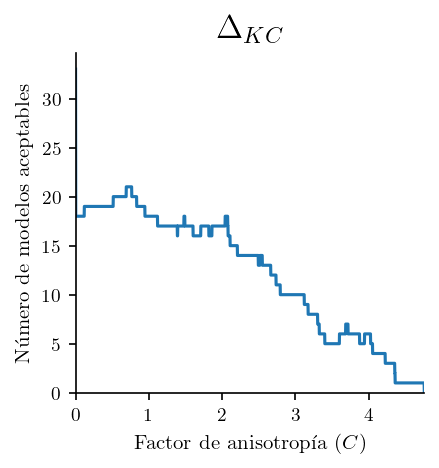

In [19]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

ax1.plot(ListaC,NMAs,linestyle='-',label=r'$\textrm{9 condiciones}$')

ax1.set_xbound(ListaC[0],ListaC[-1])
ax1.set_ybound(0,max(NMAs)+0.05*max(NMAs))
ax1.set_xlabel(r'$\textrm{Factor de anisotropía}\,\left(C\right)$',fontsize=10)
ax1.set_ylabel(r'$\textrm{Número de modelos aceptables}$',fontsize=10)
ax1.set_title(r'$\Delta_{KC}$',fontsize=16,x=0.5,y=1.01)

plt.show()

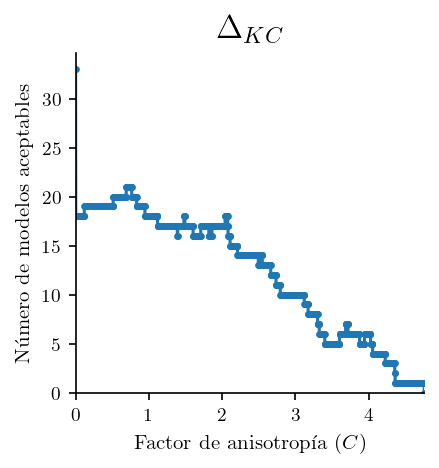

In [18]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

ax1.plot(ListaC,NMAs,linestyle='-',label=r'$\textrm{9 condiciones}$')
ax1.scatter(ListaC,NMAs,marker='o',s=5)

ax1.set_xbound(ListaC[0],ListaC[-1])
ax1.set_ybound(0,max(NMAs)+0.05*max(NMAs))
ax1.set_xlabel(r'$\textrm{Factor de anisotropía}\,\left(C\right)$',fontsize=10)
ax1.set_ylabel(r'$\textrm{Número de modelos aceptables}$',fontsize=10)

ax1.set_title(r'$\Delta_{KC}$',fontsize=16,x=0.5,y=1.01)

plt.show()

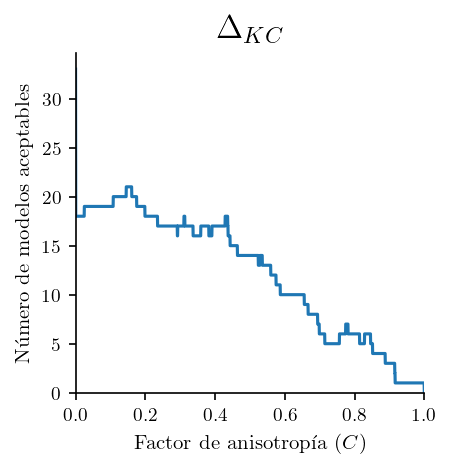

In [17]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

ax1.plot(ListaC/ListaC[-1],NMAs,linestyle='-',label=r'$\textrm{9 condiciones}$')
ax1.scatter(ListaC,NMAs,marker='o',s=0)

ax1.set_xbound(ListaC[0]/ListaC[-1],ListaC[-1]/ListaC[-1])
ax1.set_ybound(0,max(NMAs)+0.05*max(NMAs))
ax1.set_xlabel(r'$\textrm{Factor de anisotropía}\,\left(C\right)$',fontsize=10)
ax1.set_ylabel(r'$\textrm{Número de modelos aceptables}$',fontsize=10)
ax1.set_title(r'$\Delta_{KC}$',fontsize=16,x=0.5,y=1.01)

plt.show()